# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Открытие файла и первичная проверка

In [1]:
# импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

games = pd.read_csv('/datasets/games.csv')
games.info()
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### По первочному анализу данных получены следующие выводы:
- Необходимо переименовать столбцы, привести их в единый формат написания;
- Необходимо изменить тип данных столбца с годом выпуска на целочисленный;
- Замечены пропуски в стобцах с годом выпуска и жанре - так как эти показатели являются для нас критическими, а пропусков в относительном выражении немного, целесообразно от них избавиться;
- Замечены пропуски в столбцах с оценками критиков и пользователей, а также столбца с возрастным рейтингом. На первый взгляд кажется, что эти пропуски характерны для старых игр, когда еще не сложилась подобная практика оценки игр. Пропусков, на самом деле, достаточно много в относительном выражении, и их нельзя объективно заполнить по средним и медианным значениям, так как на оценку влияет множество факторов;
- Пользовательская оценка имеет тип данных 'object', необходимо заменить на 'float'.

### Шаг 2. Преподготовка данных

In [2]:
# переименуем столбцы
games.columns = ['name', 'platform', 'year', 
                 'genre', 'na_sales', 'eu_sales', 
                 'jp_sales', 'other_sales', 
                 'critic_score', 'user_score', 'rating']

In [3]:
# проверим пропуски в столбце с годом выпуска игры
games[games['year'].isna() == True]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### По результатам анализа пропусков в столбце 'year' получены следующие выводы:
- Обнаружено 269 строк с отсутствующими значениями в столбце с годом выпуска. На самом деле, по названию многих игр (в основном спортивных симуляторов) можно понять год выпуска (в случае спортивных симуляторов необходимо вычесть один год из названия, потому что, например, FIFA 2021 выходит в 2020 году);
- Все игры, которые я знаю, относятся к нерелевантному периоду (до 2010 года), так что нет смысла дополнительно обрабатывать эти данные, так как они не смогут повлиять на прогноз по продажам в 2017 году.



In [4]:
# проверим пропуски в столбце с жанрами
games[games['genre'].isna() == True]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это довольно старые игры, так что удаление этих строк не повлияет на результаты исследования

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    7983 non-null float64
user_score      9839 non-null object
rating          9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


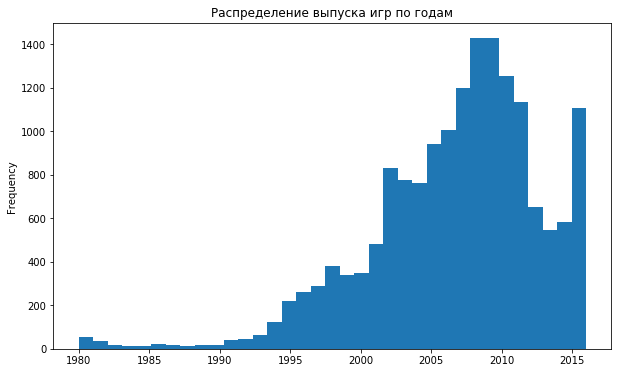

In [5]:
# оценим распределение игр по годам, заодно проверим на выборосы (ошибки, опечатки)
games['year'].plot(kind='hist', bins=35, title='Распределение выпуска игр по годам', figsize=(10,6))

# избавимся от пропусков в столбцах с годом выпуска и жанром
games = games.dropna(subset=['year', 'genre']).reset_index(drop=True)

# изменим тип данных столбца с годом выпуска на целочисленный
games['year'] = games['year'].astype(int)

# проверка 
games.info()

In [6]:
# проверим столбец с жанрами на различные регистры
games.groupby('genre')['genre'].count()

genre
Action          3307
Adventure       1293
Fighting         837
Misc            1721
Platform         878
Puzzle           569
Racing          1226
Role-Playing    1481
Shooter         1296
Simulation       857
Sports          2306
Strategy         673
Name: genre, dtype: int64

Дубликатов, которые могли возникнуть из-за разных регистров, не обнаружено

In [7]:
# проверим столбец с платформами на различные регистры
games.groupby('platform')['platform'].count()

platform
2600     116
3DO        3
3DS      512
DC        52
DS      2121
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       957
PCFX       1
PS      1190
PS2     2127
PS3     1306
PS4      392
PSP     1193
PSV      429
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1286
WiiU     147
X360    1232
XB       803
XOne     247
Name: platform, dtype: int64

Дубликатов, которые могли возникнуть из-за разных регистров, не обнаружено

In [8]:
# оценим, какие возрастные рейтинги бывают
games.groupby('rating')['rating'].count()

rating
AO         1
E       3921
E10+    1393
EC         8
K-A        3
M       1536
RP         1
T       2905
Name: rating, dtype: int64

#### Согласно рейтингу ESRB, существуют следующие категории игр:
- Для детей младшего возраста (EC);
- Для всех (E после 1998 года или K-A до 1998 года);
- Для всех от 10 лет и старше (E10+);
- Подросткам от 13 лет и старше (T);
- Для взрослых от 17 лет (M);
- Только для взрослых от 18 лет (AO);
- Рейтинг ожидается (RP). 

Исходя из этого, необходимо объединить категории 'K-A' и 'E' и дополнительно оценить те игры, по которым не получен рейтинг. 

In [9]:
# заменяем данные
games['rating'] = games['rating'].replace('K-A', 'E')

# заполняем пропуски в рейтинге аббревиатурой WR - 'without rating'
games['rating'] = games['rating'].fillna('WR')

# проверка
games.groupby('rating')['rating'].count()

rating
AO         1
E       3924
E10+    1393
EC         8
M       1536
RP         1
T       2905
WR      6676
Name: rating, dtype: int64

In [10]:
# выделим игры, которым не был присвоен рейтинг 
games.query("rating == 'RP'")

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14045,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


Данная игра продалась тиражом около 40 тысяч штук, что не очень много. Так что этими данными можно пренебречь.

In [11]:
# избавляемся от игр, которые подавали заявку в ESRB, но в итоге не получили рейнтинг
games = games.query("rating != 'RP'")

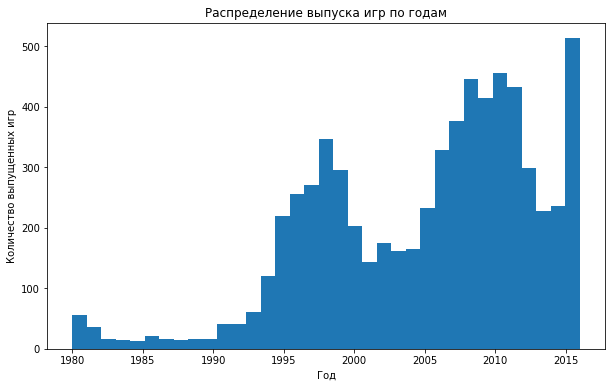

In [12]:
# проверим теорию насчет того, что игры без рейнтинга были выпущены раньше, чем образовалось ESRB
ax = games.query("rating == 'WR'")['year'].plot(kind='hist', bins=35, title='Распределение выпуска игр по годам', figsize=(10,6))
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
plt.show()

Теория, что пропуски в столбце 'rating' характерны только для старых игр, не подтвердилась. К сожалению, прочих идей у меня нет, а заменять пропуски опасно - на рейтинг, как и на оценку пользователей и критиков, влияет множество факторов.

In [13]:
# при попытке изменения типа данных столбца 'user_score' возникла ошибка из-за значений 'tbd', что означает 'to be determined'
# полагаю, что для этих игр не хватает количества оценок, чтобы рейтинг отображался. Заменим эти значения на 'NaN'
games['user_score'] = games['user_score'].replace('tbd', 'NaN').astype(float)

In [14]:
# добавим информацию об общих продажах
def total_sales(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales']

games['total_sales'] = games.apply(total_sales, axis=1)

In [15]:
# проверка
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
name            16443 non-null object
platform        16443 non-null object
year            16443 non-null int64
genre           16443 non-null object
na_sales        16443 non-null float64
eu_sales        16443 non-null float64
jp_sales        16443 non-null float64
other_sales     16443 non-null float64
critic_score    7982 non-null float64
user_score      7462 non-null float64
rating          16443 non-null object
total_sales     16443 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Шаг 3. Исследовательский анализ данных

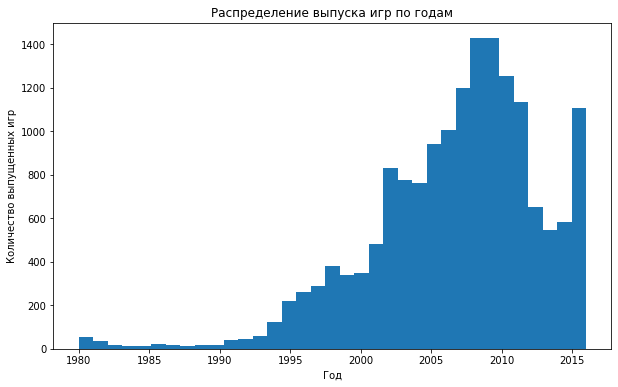

In [16]:
# заново оценим распределение игр по годам
ax = games['year'].plot(kind='hist', bins=35, title='Распределение выпуска игр по годам', figsize=(10,6))
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр')
plt.show()

По графику видно, что после 2000 года количество выпускаемых игр значительно возросло.

In [17]:
# оценим относительную долю игр, которые были выпущены до 2000 года
print('Доля игр, выпущенных до 2000 года:', round(len(games[games['year'] < 2000]['year'])/len(games['year']),2))

Доля игр, выпущенных до 2000 года: 0.12


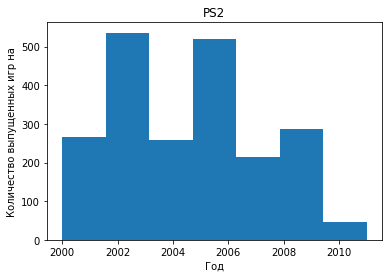

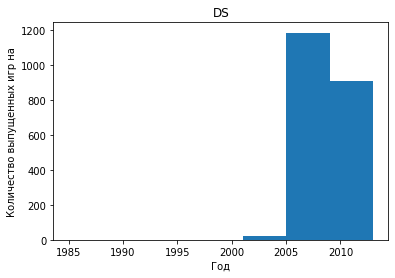

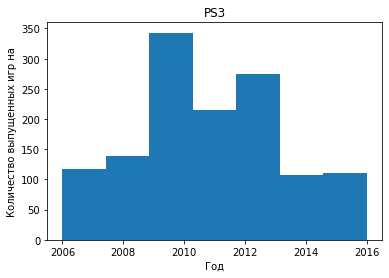

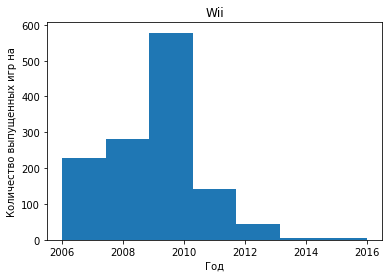

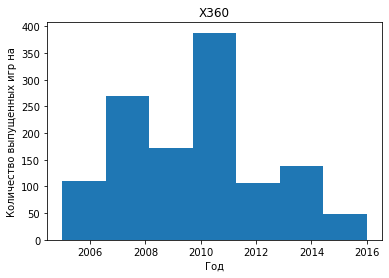

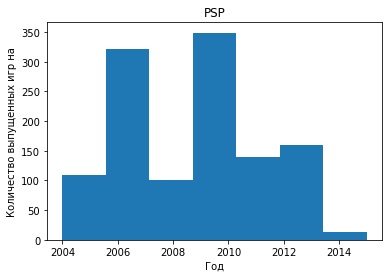

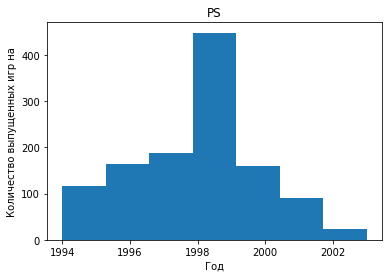

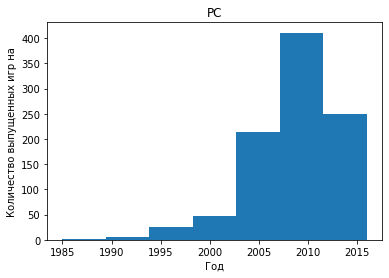

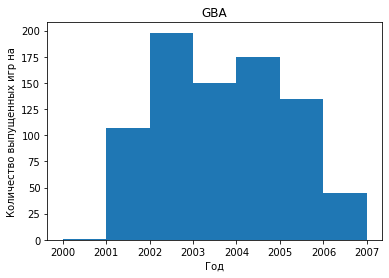

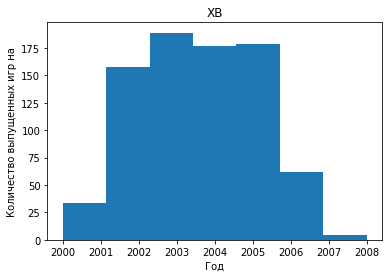

In [18]:
# оценим топ-10 платформ по количеству выпущенных игр
games.groupby('platform')['platform'].count().sort_values(ascending=False).head(10)

# создадим список с топ платформами для автоматического построения графиков
top_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 
                 'PSP', 'PS', 'PC', 'GBA', 'XB']

# построим графики
for platform in top_platforms:
    ax = games[games['platform'] == platform]['year'].plot(kind='hist', 
                                                          bins=7, 
                                                          title=platform)
    ax.set_xlabel('Год')
    ax.set_ylabel('Количество выпущенных игр на')
    plt.show()

#### По итогам анализа графиков, получены следующие выводы:
- Для PC невозможно выделить срок жизни, так как это постоянно обновляемая платформа;
- Для мобильных консолей (DS, PSP, GBA) жизненный цикл составляет около 6 лет;
- Для домашних консолей жизненный цикл составляет около 8 лет.

Так как жизненный цикл включает в себя и рост, и падение, определим актуальный период в размере 5 лет.

In [19]:
# выделим игры, выпущенные за последние 5 лет, в отдельную переменную
new_games = games[games['year'] >= (games['year'].max() - 5)]

# оценим размер выборки
new_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 16 to 16443
Data columns (total 12 columns):
name            4021 non-null object
platform        4021 non-null object
year            4021 non-null int64
genre           4021 non-null object
na_sales        4021 non-null float64
eu_sales        4021 non-null float64
jp_sales        4021 non-null float64
other_sales     4021 non-null float64
critic_score    1811 non-null float64
user_score      2031 non-null float64
rating          4021 non-null object
total_sales     4021 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 408.4+ KB


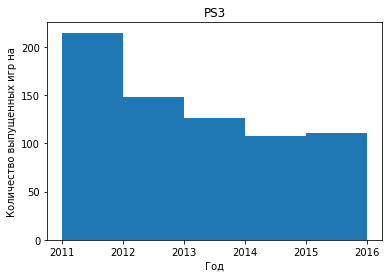

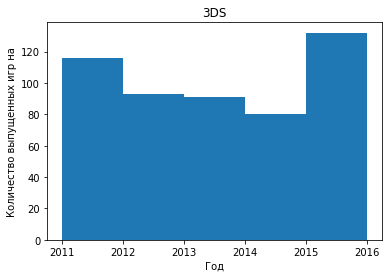

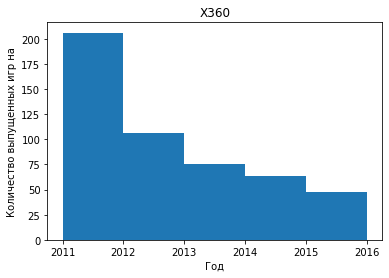

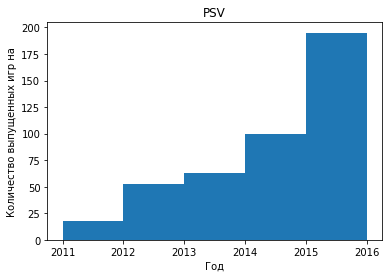

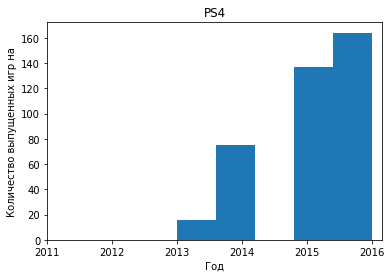

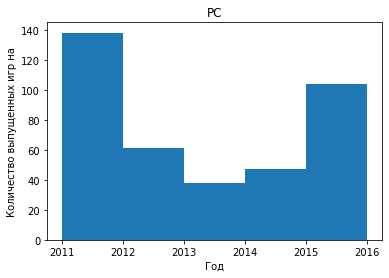

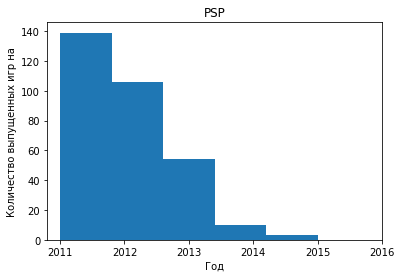

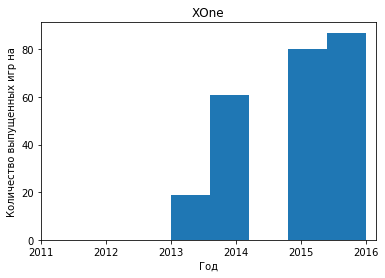

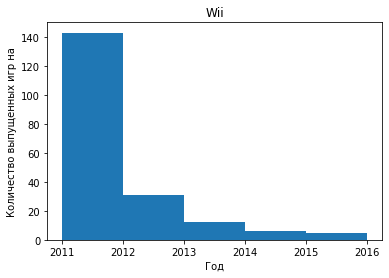

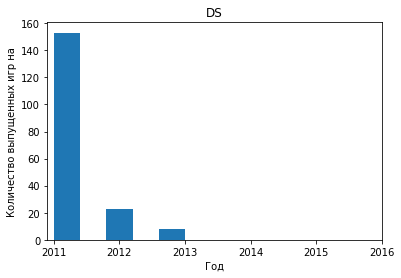

In [20]:
# заново оценим топ-10 платформ по количеству выпущенных игр
new_games.groupby('platform')['platform'].count().sort_values(ascending=False).head(10)

# создадим список с топ платформами для автоматического построения графиков
top_platforms_new = ['PS3', '3DS', 'X360', 'PSV', 'PS4', 
                 'PC', 'PSP', 'XOne', 'Wii', 'DS']

for platform in top_platforms_new:
    ax = new_games[new_games['platform'] == platform]['year'].plot(kind='hist', 
                                                              bins=5, 
                                                              title=platform,
                                                              xticks=[i for i in range(2011, 2017)])
    ax.set_xlabel('Год')
    ax.set_ylabel('Количество выпущенных игр на')
    plt.show()

#### По графикам можно сделать следующие выводы:
- В сегменте домашних консолей наблюдается рост количества выпускаемых игр на PS4 и Xbox One;
- В сегменте портативных консолей в период 2011-2016 гг наибольший рост показывает PS Vita;
- PC очень сложно оценивать, но очевидно, что эта платформа вечная, и на нее выпускается больше всего игр, так как большинство консольных игр также выходят и на PC.

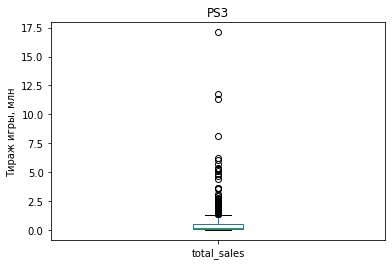

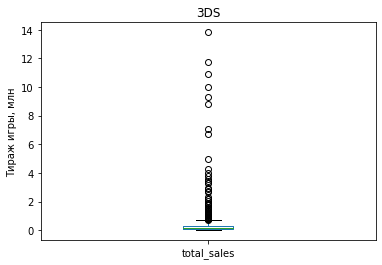

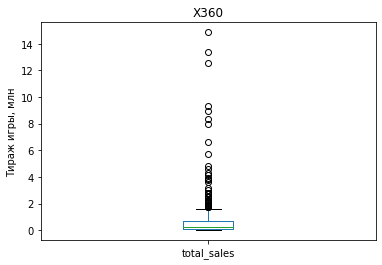

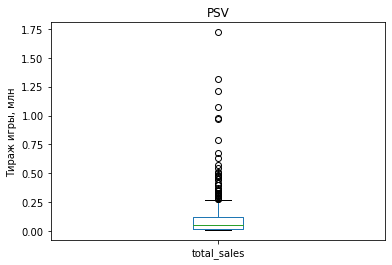

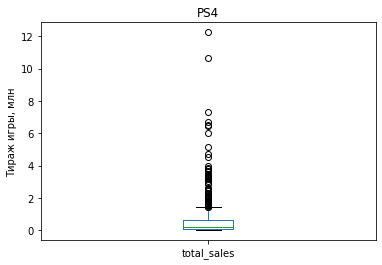

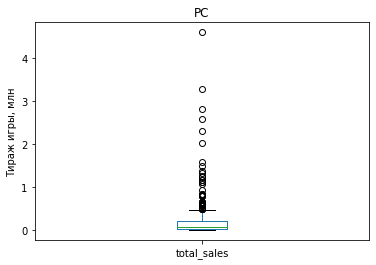

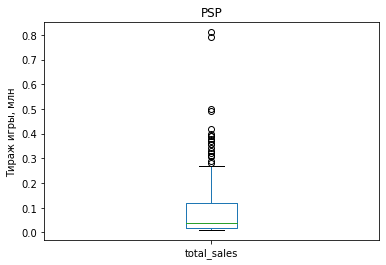

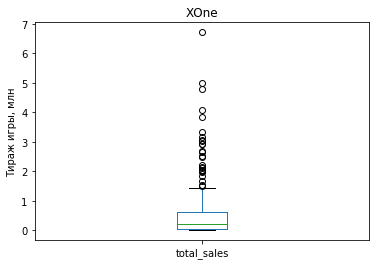

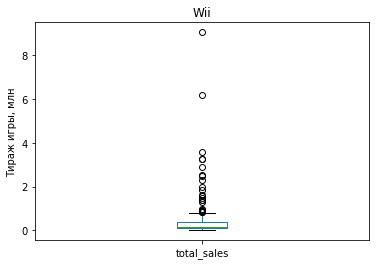

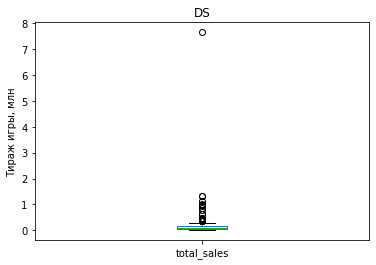

In [21]:
# построим ящики с усами для общих продаж игры по платформам за последние 5 лет
for platform in top_platforms_new:
    ax = new_games[new_games['platform'] == platform]['total_sales'].plot(kind='box', title=platform)
    ax.set_ylabel('Тираж игры, млн')
    plt.show()

#### По результатам анализа ящиков с усами получены следующие выводы:
- Очевидно, что у каждой платформы есть хиты, которые продаются многократно лучше, чем рядовые игры. Результат вполне законмерный, так как производители консолей привлекают игроков эксклюзивами, и зарабатывают именно на играх и сервисах, а не на самих консолях;
- В период 2011-2016 гг еще очень неплохо продаются игры для 'past-gen' - X360 и PS3, так как этот период характеризуется закатом этих платформ и выхода самых качественных игр, которые могли появиться на этих платформах.

                        PS3


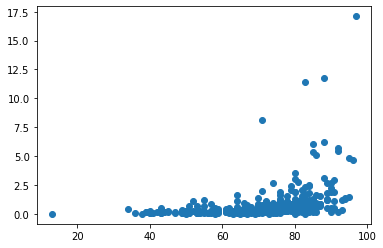

Корреляция оценок критиков и продаж на PS3 составляет 0.38

                        X360


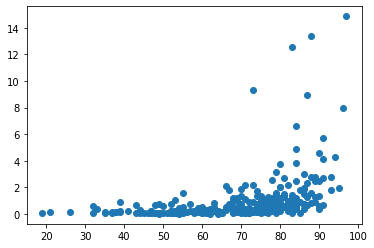

Корреляция оценок критиков и продаж на X360 составляет 0.39

                        PS4


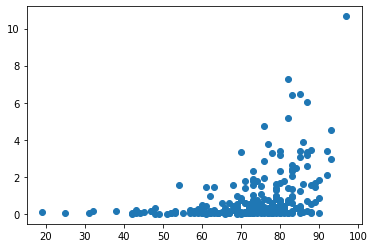

Корреляция оценок критиков и продаж на PS4 составляет 0.41

                        3DS


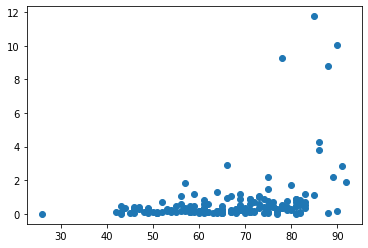

Корреляция оценок критиков и продаж на 3DS составляет 0.35

                        Wii


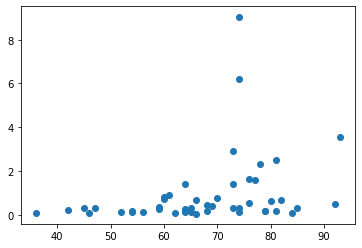

Корреляция оценок критиков и продаж на Wii составляет 0.29

                        DS


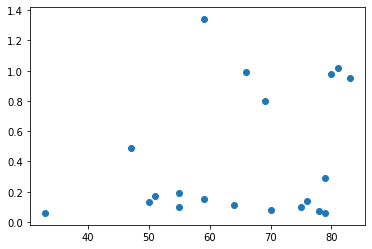

Корреляция оценок критиков и продаж на DS составляет 0.27

                        XOne


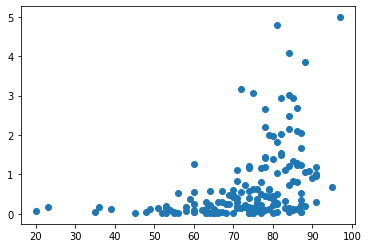

Корреляция оценок критиков и продаж на XOne составляет 0.42

                        WiiU


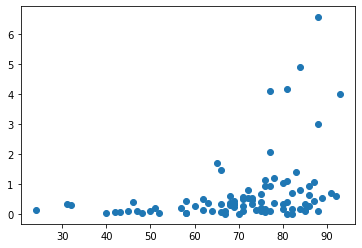

Корреляция оценок критиков и продаж на WiiU составляет 0.35

                        PC


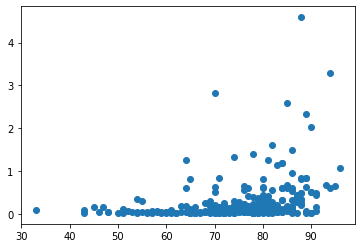

Корреляция оценок критиков и продаж на PC составляет 0.31

                        PSV


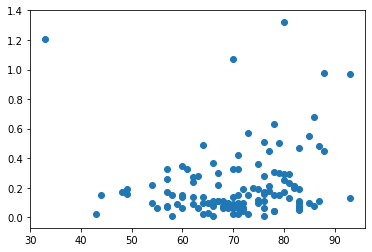

Корреляция оценок критиков и продаж на PSV составляет 0.14

                        PSP


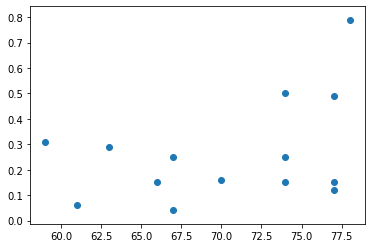

Корреляция оценок критиков и продаж на PSP составляет 0.39

                        PS2


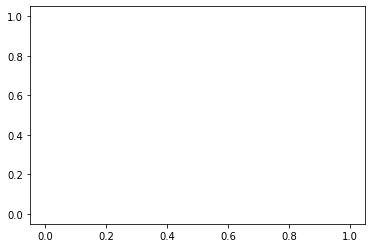

Корреляция оценок критиков и продаж на PS2 составляет nan



In [22]:
# построим диаграммы рассеивания и рассчитаем корреляцию между оценками критиков и игроков и суммарными продажами игры
for platform in new_games['platform'].unique():
    print('                       ', platform)
    plt.scatter(x=new_games[new_games['platform'] == platform]['critic_score'], 
                y=new_games[new_games['platform'] == platform]['total_sales'])
    ax.set_xlabel('Оценка критиков')
    ax.set_ylabel('Тираж игры, млн')
    plt.show()
    print('Корреляция оценок критиков и продаж на', platform, 'составляет', 
          round(new_games[new_games['platform'] == platform].loc[:,['critic_score', 'total_sales']].corr().iloc[0,-1],2))
    print()

                        PS3


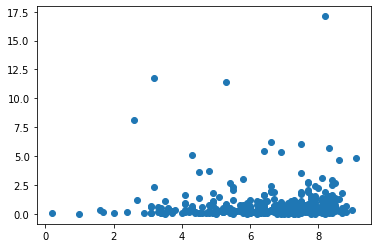

Корреляция оценок пользователей и продаж на PS3 составляет 0.01

                        X360


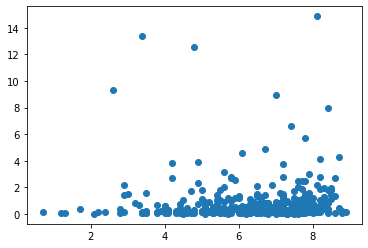

Корреляция оценок пользователей и продаж на X360 составляет 0.04

                        PS4


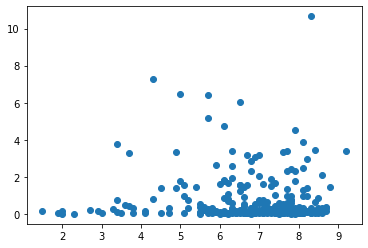

Корреляция оценок пользователей и продаж на PS4 составляет -0.03

                        3DS


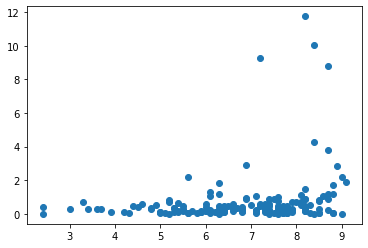

Корреляция оценок пользователей и продаж на 3DS составляет 0.22

                        Wii


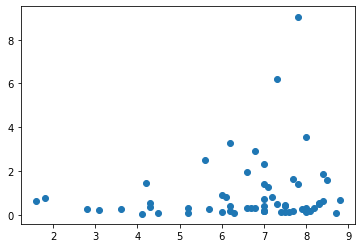

Корреляция оценок пользователей и продаж на Wii составляет 0.15

                        DS


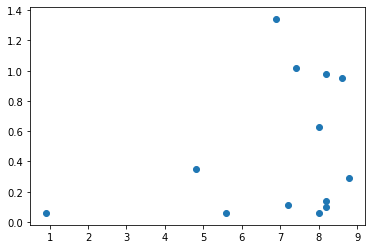

Корреляция оценок пользователей и продаж на DS составляет 0.28

                        XOne


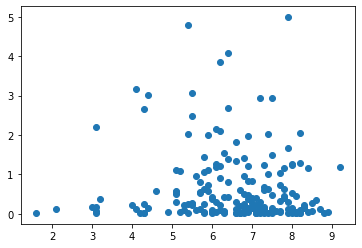

Корреляция оценок пользователей и продаж на XOne составляет -0.07

                        WiiU


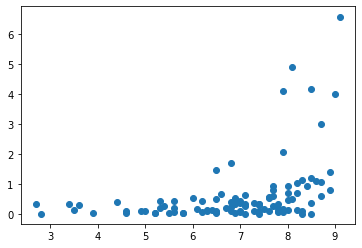

Корреляция оценок пользователей и продаж на WiiU составляет 0.4

                        PC


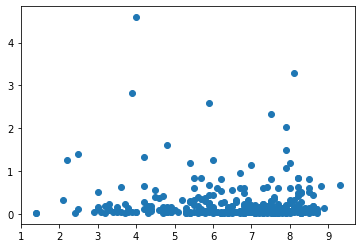

Корреляция оценок пользователей и продаж на PC составляет -0.05

                        PSV


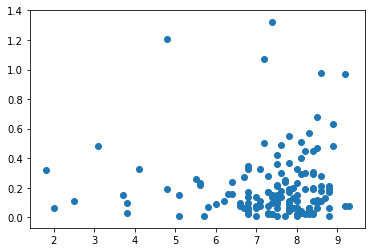

Корреляция оценок пользователей и продаж на PSV составляет 0.03

                        PSP


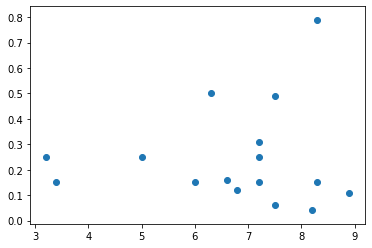

Корреляция оценок пользователей и продаж на PSP составляет 0.08

                        PS2


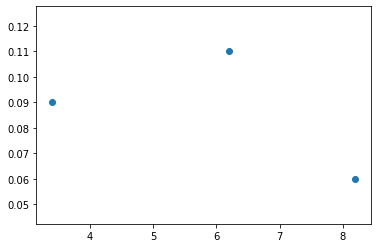

Корреляция оценок пользователей и продаж на PS2 составляет -0.52



In [23]:
# повторим то же самое для оценок пользователей
for platform in new_games['platform'].unique():
    print('                       ', platform)
    plt.scatter(x=new_games[new_games['platform'] == platform]['user_score'], 
                y=new_games[new_games['platform'] == platform]['total_sales'])
    plt.show()
    print('Корреляция оценок пользователей и продаж на', platform, 'составляет', 
          round(new_games[new_games['platform'] == platform].loc[:,['user_score', 'total_sales']].corr().iloc[0,-1],2))
    print()

#### По результатам оценки диаграмм рассеивания и коэффициентов корреляции, получены следующие выводы:
- Исходя из данной выборки, оценки пользователей практически не влияют на продажи игр;
- Оценка критиков имеет значение для продаж игры, однако эта связь не сильная (0.3-0.4, что соответствует средневыраженной прямой зависимости).

In [24]:
# оценим, сколько игр каждого жанра выпускалось, на основе предоставленных данных
print(new_games.groupby('genre')['genre'].count().sort_values(ascending=False))
print()
for genre in new_games['genre'].unique():
    print('Доля игр, выпущенных в жанре', genre,', составляет:', 
          '{:.2%}'.format(len(new_games[new_games['genre'] == genre]) / len(new_games['genre'])))

    

genre
Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         116
Puzzle            71
Name: genre, dtype: int64

Доля игр, выпущенных в жанре Action , составляет: 31.56%
Доля игр, выпущенных в жанре Shooter , составляет: 8.18%
Доля игр, выпущенных в жанре Role-Playing , составляет: 11.56%
Доля игр, выпущенных в жанре Racing , составляет: 4.48%
Доля игр, выпущенных в жанре Platform , составляет: 3.03%
Доля игр, выпущенных в жанре Misc , составляет: 9.33%
Доля игр, выпущенных в жанре Simulation , составляет: 3.38%
Доля игр, выпущенных в жанре Sports , составляет: 9.67%
Доля игр, выпущенных в жанре Fighting , составляет: 3.95%
Доля игр, выпущенных в жанре Adventure , составляет: 10.20%
Доля игр, выпущенных в жанре Puzzle , составляет: 1.77%
Доля игр, выпущенных в жанре Strategy , составляет: 2.88%


#### По результатам анализа распределения игр по жанрам получены следующие результаты:
- Почти каждая третья игра (31.56%) выпускалась в жанре экшн, что не увидительно, так как это формат, подходящий большинству геймеров в мире;
- Далее идут сразу 3 жанра, имеющие около 10% доли в продажах: РПГ, приключения и спортивные симуляторы;
- Наименьшими по распространенности оказались жарны стратегий (2.88%) и головоломок (1.77%), так как ими интересуются по большей части игроки старшего возраста, и это далеко не целевая аудитория для производителей игр.

In [25]:
# оценим среднее количество проданных копий (в млн штук) игр каждого жанра
for genre in new_games['genre'].unique():
    print('Среднее количество проданных копий жанра', genre,', составляет:', 
          '{:.2f}'.format(new_games[new_games['genre'] == genre]['total_sales'].mean()),
          'с возможным отклонением в {:.2f}'.format(np.std(new_games[new_games['genre'] == genre]['total_sales'])), 
          'млн штук')

Среднее количество проданных копий жанра Action , составляет: 0.39 с возможным отклонением в 0.96 млн штук
Среднее количество проданных копий жанра Shooter , составляет: 1.08 с возможным отклонением в 1.99 млн штук
Среднее количество проданных копий жанра Role-Playing , составляет: 0.49 с возможным отклонением в 1.20 млн штук
Среднее количество проданных копий жанра Racing , составляет: 0.43 с возможным отклонением в 1.11 млн штук
Среднее количество проданных копий жанра Platform , составляет: 0.66 с возможным отклонением в 1.40 млн штук
Среднее количество проданных копий жанра Misc , составляет: 0.34 с возможным отклонением в 0.86 млн штук
Среднее количество проданных копий жанра Simulation , составляет: 0.34 с возможным отклонением в 0.96 млн штук
Среднее количество проданных копий жанра Sports , составляет: 0.54 с возможным отклонением в 0.92 млн штук
Среднее количество проданных копий жанра Fighting , составляет: 0.38 с возможным отклонением в 0.74 млн штук
Среднее количество прода

#### По результатам анализа среднего количества проданных копий игр каждого жанра получены следующие выводы:
- Больше всего в среднем продается игр в жанре шутеров, который тянут за собой три вечные франшизы: Counter Strike, Battlefield и Call of Duty;
- Для абсолютно всех жанров характерно следующее: среднеквадратическое отклонение выше, чем среднее значение, что характеризует ненормальное распределение продаж игр для кажлого жанра.

### Шаг 4. Составление портрета пользователя каждого региона

In [26]:
regions = {'EU':['eu_sales', 'Статистика по Европе в 2011-2016 годах'], 
           'NA':['na_sales', 'Статистика по Северной Америке в 2011-2016 годах'], 
           'JP':['jp_sales', 'Статистика по Японии в 2011-2016 годах']}
# создадим цикл, автоматизирующий анализ регионов
for region in regions.keys():
    print(regions[region][1])
    print()
    print('Топ-5 платформ')
    display(new_games.groupby('platform')[regions[region][0]].sum().sort_values(ascending=False).head(5))
    print()
    print('Топ-5 жанров')
    display(new_games.groupby('genre')[regions[region][0]].sum().sort_values(ascending=False).head(5))
    print()
    print('Средние продажи игр каждого возрастного рейтинга')
    display(new_games.groupby('rating')[regions[region][0]].mean().sort_values(ascending=False))

Статистика по Европе в 2011-2016 годах

Топ-5 платформ


platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.67
Name: eu_sales, dtype: float64


Топ-5 жанров


genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64


Средние продажи игр каждого возрастного рейтинга


rating
M       0.402347
E       0.229337
E10+    0.171053
T       0.135000
WR      0.068273
EC      0.000000
Name: eu_sales, dtype: float64

Статистика по Северной Америке в 2011-2016 годах

Топ-5 платформ


platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64


Топ-5 жанров


genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64


Средние продажи игр каждого возрастного рейтинга


rating
M       0.495900
EC      0.420000
E       0.275356
E10+    0.258158
T       0.177451
WR      0.072418
Name: na_sales, dtype: float64

Статистика по Японии в 2011-2016 годах

Топ-5 платформ


platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64


Топ-5 жанров


genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64


Средние продажи игр каждого возрастного рейтинга


rating
WR      0.080919
E       0.059353
T       0.054205
M       0.042026
E10+    0.024627
EC      0.000000
Name: jp_sales, dtype: float64

#### По результатам анализа регионов получены следующие результаты:
##### Европа:
- Лидирующие позиции по платформам занимает Playstation 3 и Playstation 4, что характеризует доминирующее положение Sony на европейском рынке;
- Наиболее популярными жанрами являются: экшн, шутер, спортивные симуляторы, РПГ и гонки. Такой рейтинг вполне соответствует моим субъективным ощущениям относительно предпочтений геймера из Европы;
- Рейтинг ESRB значительно влияет на средние продажи, и лидирующее положение занимают игры с рейтингом M (17+): такие игры более амбициозны, масштабны, предлагают уникальный опыт (GTA V, Wicher 3). 

##### Северная Америка:
- Не увидительно, что суммарные продажи игр на Xbox превышают аналогичный показатель для Playstation: Microsoft, выпускающая Xbox, является Американской компанией и гораздо более близка к американскому геймеру. Однако, если рассматривать только 'current-gen', то оказывается, что PS4 доминирует над Xbox One, хоть и незначительно;
- Распределение по жанрам очень сильно повторяет европейскую картину: отличие лишь в пятом месте;
- Рейтинг ESRB похожим образом влияет на продажи, однако уже не так очевидно доминирующее положение игр с рейтигом M;
- В целом, по цифрам за 2011-2016, игровой рынок Северной Америки на 30-40% объемней, чем рынок Европы.

##### Япония:
- Очевидно, что в случае с Японией не обошлось без сюрпризов: абсолютное доминирование японских компаний Sony и Nintendo, причем суммарные продажи игр на портативные консоли значительно превышают продажи игр на домашние консоли;
- С жанрами игр такая же ситуация: абсолютное первое место по жанру RPG. Также в пятерке мы видим файтинги и платформеры;
- А вот с рейтингом ESRB ситуация еще интереснее, и проясняет картину с большим количеством пропусков в этой категории: рейтинг ESRB создан в первую очередь для рынка Северной Америки, а так как Европа по вкусовым предпочтениям схожа с Америкой, то рейтинг ESRB имеет хоть какое-то влияние на него. Хотя для Европы существует собственная организация, которая оценивает игры: PEGI. В Японии же работает третья организация: CERO. Поэтому рейтинг ESRB крайне незначительно влияет на продажи игр в Японии.
- В целом по цифрам, размер игрового рынка Японии самый маленький из рассматриваемых. Однако стоит принимать во внимание соотношения продаваемых игр и население, то окажется, что Япония значительно более 'играющая' страна.

### Шаг 5. Проверка гипотез

#### Сформируем нулевую и альтернативную гипотезы относительно пользовательских рейтингов Xbox One и PC:
- Нулевая гипотеза: пользовательские рейтинги данных платформ равны;
- Альтернативная гипотеза: пользовательские рейтинги данных платформ различаются.

#### Сформируем нулевую и альтернативную гипотезы относительно пользовательских рейтингов жанров 'Action' и 'Sports':
- Нулевая гипотеза: пользовательские рейтинги данных жанров равны;
- Альтернативная гипотеза: пользовательские рейтинги данных жарнов различаются.

Для проверки гипотез будет использован метод сравнений средних двух генеральных совокупностей, потому что в каждом случае мы имеем дело с выборками из двух генеральных совокупностей: всех игр на Xbox One и всех игр на PC в первом случае, всех игр в жанре Action и всех игр в жанре Sports - во втором случае. 

Для значения параметра `equal_var` необходимо провести дополнительно исследование.

Пороговое значение `Alpha` определим в размере 0.05 - вероятность совершить ошибку первого рода, то есть отвергнуть нулевую гипотезу, если на самом деле она верна. 


In [27]:
# исследуем дисперсии рассматриваемых выборок
pc_games_var = np.var(new_games.query('platform == "PC" and user_score > 0')['user_score'])
xone_games_var = np.var(new_games.query('platform == "XOne" and user_score > 0')['user_score'])

# если дисперсии будут отличаться более, чем на 5%, то будем предполагать, что они не равны
if 0.95 < pc_games_var / xone_games_var < 1.05:
    print('Дисперсии равны')
else:
    print('Дисперсии не равны')

Дисперсии не равны


In [28]:
# исследуем выборки игр разных платформ, при условии, что дисперсии не равны
pc_games = new_games.query('platform == "PC" and user_score > 0')['user_score']
xone_games = new_games.query('platform == "XOne" and user_score > 0')['user_score']
results = st.ttest_ind(pc_games, xone_games, equal_var = False)

alpha = .05

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
    print('Если средний пользовательский рейтинг не равен, необходимо провести дополнительное исследование')
    if xone_games.mean() < pc_games.mean():
        print("Средний пользовательский рейтинг на PC выше, чем на Xbox One")
    else:
        print("Средний пользовательский рейтинг на Xbox One выше, чем на PC")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.6077955556766887
Не получилось отвергнуть нулевую гипотезу


In [29]:
# исследуем дисперсии рассматриваемых выборок
action_games_var = np.var(new_games.query('genre == "Action" and user_score > 0')['user_score'])
sport_games_var = np.var(new_games.query('genre == "Sports" and user_score > 0')['user_score'])

# если дисперсии будут отличаться более, чем на 5%, то будем предполагать, что они не равны
if 0.95 < action_games_var / sport_games_var < 1.05:
    print('Дисперсии равны')
else:
    print('Дисперсии не равны')

Дисперсии не равны


In [30]:
# исследуем выборки игр жанров 'Action' и 'Sports', при условии неравенства дисперсий
action_games = new_games.query('genre == "Action" and user_score > 0')['user_score']
sport_games = new_games.query('genre == "Sports" and user_score > 0')['user_score']
results = st.ttest_ind(action_games, sport_games, equal_var = False)

alpha = .05

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
    print('Если средний пользовательский рейтинг не равен, необходимо провести дополнительное исследование')
    if action_games.mean() < sport_games.mean():
        print("Средний пользовательский рейтинг жанра 'Sports' выше и составляет", 
              round(sport_games.mean(),2), 'против', round(action_games.mean(),2))
    else:
        print("Средний пользовательский рейтинг жанра 'Action' выше и составляет", 
              round(action_games.mean(),2), 'против', round(sport_games.mean(),2))
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  8.285648549432565e-19
Отвергаем нулевую гипотезу
Если средний пользовательский рейтинг не равен, необходимо провести дополнительное исследование
Средний пользовательский рейтинг жанра 'Action' выше и составляет 6.78 против 5.65


#### По результатам проверки статистических гипотез получены следующие выводы:
- Скорее всего, средние пользовательские рейтинги игр на PC и Xbox One не отличаются. На самом деле, это ожидаемый результат, так как Microsoft, в отличие от Sony, не поддерживает политику эксклюзивов, и все игры от внутренних студий выпускает также на PC;
- Средние пользовательские рейтинги жанров 'Action' и 'Sports' отличаются, что также является закономерным выводом, так как жанр очень сильно влияет на восприятие игры. При этом, скорее всего, средний рейтинг жанра 'Action' выше, чем жанра 'Sports', больше чем на целый балл. 

### Общий вывод

#### По результатам проведенного анализа получены следующие выводы:
- Состояние рынка Северной Америки по части распределения игр по жанрам очень похоже на рынок Европы, однако по части платформ есть различия - европейскому геймеру больше по душе PlayStation, геймеру из Северной Америки - Xbox;
- Америкаский рейтинг ESRB, из-за схожести рынков Америки и Европы, в целом можно использовать в качестве вспомогательного фактора для оценки продаваемости игры, однако в случае Европы все равно целесообразней использовать рейтинг PEGI - Pan European Game Information;
- Рынок Японии имеет свои уникальные особенности - у них в почете портативные консоли, причем исключительно японские, а из игр они больше предпочитают RPG. При этом у них также своя организация, определяющая возрастные ограничения - Computer Entertainment Rating Organization (CERO);
- Пользовательские оценки для платформ PC и Xbox One, скорее всего, не отличаются, так как для Microsoft не характерна политика эксклюзивов: многие игры выходят и на PC, и на Xbox;
- Средние пользовательские рейтинги жанров 'Action' и 'Sports' отличаются, поэтому можно сделать вывод, что жанр сильно влияет на восприятие игры;
- Распределение продаж игр имеет ненормальный вид, из-за чего среднеквадратическое отклонение вдвое превышает среднее значение;
- Актуальный период для платформы - 8-10 лет, при этом половина отведена под рост популярности, а половина - под её падение, и появление 'next-gen' платформ, поэтому актуальный период составляет 4-5 лет.

#### В качестве рекомендаций, какие данные также можно выгружать для анализа в следующем исследовании, выделим следующие:
- Одного рейтинга ESRB недостаточно - это не общемировой, а локальный стандарт. Поэтому целесообразно было бы добавить данные об оценке европейской PEGI и японской CERO;
- Для оценки прибыльности конкретного тайтла можно добавить бюджет игры, а также сборы не только в штучном объеме, а также в денежном, по аналогии с кино.